Prepared by

*Asif Newaz*

*Lecturer, EEE, IUT*

**This notebook covers how to use a pre-trained model for predictions**

Models like AlexNet, VGG16, or Inception are trained on the ImageNet dataset which consists of 1000 different classes. We can use the weights that were learned during training directly for our classification tasks.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# VGG16 model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
model_1 = VGG16()
model_1.summary()

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

We can see from the summary that the input image has to be of shape (224,224). The model has around 138 million parameters.

Check the documentation to understand the input parameters -
https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16

# Import image for classification

Import a sample image for classification. You can upload the image directly into colab which will be saved temporarily or you can load an image from drive.


In [ ]:
ii= plt.imread('cat.jpeg')

In [ ]:
ii.shape

(2048, 1691, 3)

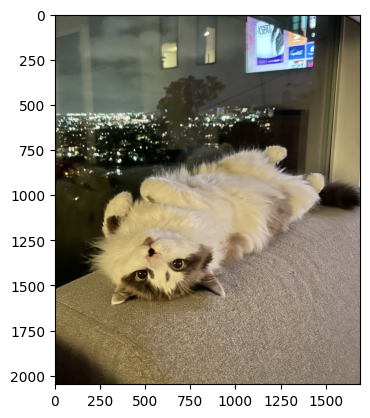

In [ ]:
plt.imshow(ii)

The image is an RGB image of shape (2048, 1691). However, for our VGGNet, we need a different image shape. So, we need to resize our image.

In [ ]:
icat = tf.keras.preprocessing.image.load_img('cat.jpeg', target_size=(224, 224))

In [ ]:
icat.size

(224, 224)

In [ ]:
print(icat)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7FAB54BB8490>


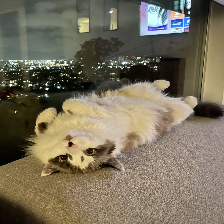

In [ ]:
icat

# Processing input image

We need to convert the image into a numpy array to work with it.

In [ ]:
icatn = tf.keras.preprocessing.image.img_to_array(icat)
icatn

array([[[ 86.,  87.,  79.],
        [ 87.,  89.,  78.],
        [ 87.,  89.,  76.],
        ...,
        [138., 134., 148.],
        [138., 134., 148.],
        [137., 135., 148.]],

       [[ 87.,  88.,  80.],
        [ 87.,  89.,  78.],
        [ 84.,  86.,  73.],
        ...,
        [136., 132., 146.],
        [138., 134., 148.],
        [135., 133., 146.]],

       [[ 85.,  87.,  74.],
        [ 88.,  90.,  77.],
        [ 86.,  88.,  75.],
        ...,
        [135., 129., 141.],
        [139., 133., 145.],
        [139., 135., 149.]],

       ...,

       [[ 13.,   8.,   5.],
        [ 12.,   7.,   4.],
        [ 14.,   9.,   5.],
        ...,
        [129., 116., 107.],
        [131., 118., 109.],
        [141., 131., 122.]],

       [[ 13.,   8.,   5.],
        [ 12.,   7.,   4.],
        [ 12.,   7.,   4.],
        ...,
        [139., 126., 118.],
        [125., 114., 108.],
        [133., 122., 118.]],

       [[ 10.,   5.,   2.],
        [ 11.,   6.,   3.],
        [ 13.,  

In [ ]:
icatn.shape

(224, 224, 3)

VGGNet expects an input of size (n, w, h, c), where n=no of images, w =width, h=height, and c=channels. Since our single image input is of size 3D, we need to convert it into a 4D array -> by adding 'n' (=1, for our case) into the array.

In [ ]:
icatnn = icatn.reshape((1, icatn.shape[0], icatn.shape[1], icatn.shape[2]))
icatnn.shape

(1, 224, 224, 3)

We also need to preprocess the image as the original training data was preprocessed.

In [ ]:
icatf= tf.keras.applications.vgg16.preprocess_input(icatnn)
icatf.shape

(1, 224, 224, 3)

# Prediction

In [ ]:
pred= model_1.predict(icatf)
pred

1/1 [==============================] - 1s 931ms/step


array([[1.97611638e-09, 1.90775697e-08, 2.11206075e-08, 2.44786480e-09,
        2.85417538e-08, 5.48123715e-08, 8.38682439e-08, 5.14204316e-07,
        1.33532585e-05, 5.97126526e-09, 6.38108344e-10, 1.69630132e-09,
        3.92445382e-10, 9.50348911e-10, 1.67487035e-09, 1.40601433e-10,
        9.50595019e-11, 8.53397424e-08, 1.16957644e-08, 1.58920308e-08,
        3.94752586e-09, 8.22146351e-10, 1.43674669e-07, 1.49380117e-08,
        2.55142965e-08, 7.02439173e-09, 6.92000832e-11, 8.92986463e-10,
        2.86641235e-08, 1.06750431e-08, 2.30678143e-10, 2.22078078e-10,
        8.77906636e-11, 1.57186015e-08, 5.44497880e-07, 1.05524561e-10,
        1.32976776e-08, 9.76392389e-09, 4.36926051e-10, 1.53082991e-09,
        6.10618708e-11, 3.20713567e-10, 8.43847908e-11, 7.27481270e-11,
        1.33914588e-10, 2.10644558e-07, 7.34098227e-10, 2.62514511e-12,
        1.48204271e-09, 1.10677267e-09, 1.34010012e-08, 5.87047355e-10,
        2.15864229e-10, 1.45565726e-10, 6.43565867e-10, 1.621525

you can see all the probability values for 1000 different categories.

In [ ]:
pred.shape

(1, 1000)

# Interpreting model prediction

In [ ]:
op = tf.keras.applications.vgg16.decode_predictions(pred)

35363/35363 [==============================] - 0s 0us/step


In [ ]:
op

[[('n02111500', 'Great_Pyrenees', 0.47961354),
  ('n02111889', 'Samoyed', 0.18672991),
  ('n02098286', 'West_Highland_white_terrier', 0.17033876),
  ('n02086079', 'Pekinese', 0.051768236),
  ('n02098413', 'Lhasa', 0.03700704)]]

As we can see, the image is not correctly identified. It is thought as a dog (different breeds) which is understandable as the cat looks similar to a pyrenees.

**Lab Task - Try with a different image and a different architecture**
